# Intro:
 
Cryptocurrency represents a relatively new and distinct form of currency that shares some similarities with both fiat money and commodity money, yet also possesses unique characteristics due to its digital and decentralized nature. Let's explore how cryptocurrency compares to these traditional forms of money:

## Similarities to Commodity Money:

Limited Supply: Like commodity money, many cryptocurrencies have a predefined maximum supply. For example, Bitcoin has a fixed supply of 21 million coins, which is meant to mimic the scarcity aspect of commodities.

Decentralization: Cryptocurrencies often operate on decentralized networks, which means they are not controlled by a single entity (like a central bank). This is reminiscent of the decentralized nature of commodity money.

## Differences from Commodity Money:

Intrinsic Value: Unlike commodity money, cryptocurrencies do not have intrinsic value. Their value is largely driven by market demand, supply dynamics, and speculative trading. They lack a physical backing or direct linkage to a tangible commodity.

Digital Nature: Cryptocurrencies are purely digital assets that exist in the form of code on distributed ledgers (blockchains). They lack the physical presence associated with commodity money.

## Similarities to Fiat Money:

Trust-Based Value: Similar to fiat money, the value of cryptocurrencies is largely based on trust and belief in their utility, security, and potential for adoption.

Acceptance as Medium of Exchange: Cryptocurrencies are accepted as a medium of exchange in various transactions and can be used for online purchases, investment, remittances, and more, akin to how fiat money is used.

Government Independence: Just as fiat money can exist independently of a commodity backing, cryptocurrencies operate independently of governmental control. They are not issued or regulated by any central authority.

## Differences from Fiat Money:

Decentralization: While both cryptocurrencies and fiat money can be decentralized in their operation (e.g., through distributed ledger technology), most fiat money is still ultimately managed by central banks or governments, whereas cryptocurrencies operate on decentralized networks.

Volatility: Cryptocurrencies tend to exhibit much higher price volatility compared to most fiat currencies. This volatility can be a result of speculative trading, market sentiment, and relatively small market sizes.

In essence, cryptocurrencies combine certain aspects of both commodity money and fiat money while introducing their own unique features. They are digital assets that rely on decentralized technology and market demand for their value. The lack of intrinsic value and the presence of extreme price volatility distinguish cryptocurrencies from traditional forms of money. Their role in the global economy and financial landscape continues to evolve as they gain wider acceptance and use cases.

# `EDA` (Exploratory Data Analysis)

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo.

En esta línea, hay varios aspectos indispensables que **deben** ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: 

### *búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados*. 

Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

***En caso de hacer uso de librerías como pandas_profiling, es indispensable acompañar los gráficos con análisis propios.***

## 📚 Libreries:

In [1]:
import requests
import pandas as pd
import seaborn as sns
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time  # Import the time module

## 🔌 [API CoinGecko](https://www.coingecko.com/es/api/documentation): conection 

### 🌎📊  Global data:
Get global data - total_volume, total_market_cap, ongoing icos etc

In [2]:

def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_data = response.json()
        list_of_global_data = pd.DataFrame(global_data)
        return list_of_global_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_data = get_coin_list()
    if list_of_global_data is not None:
        print(list_of_global_data)

                                                                                   data
active_cryptocurrencies                                                           10107
ended_icos                                                                         3376
market_cap_change_percentage_24h_usd                                          -6.419991
market_cap_percentage                 {'btc': 46.47758193454356, 'eth': 18.270301901...
markets                                                                             821
ongoing_icos                                                                         49
total_market_cap                      {'btc': 41871838.400301926, 'eth': 657303809.1...
total_volume                          {'btc': 4570826.347952866, 'eth': 71752798.167...
upcoming_icos                                                                         0
updated_at                                                                   1692370033


In [3]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
market_cap_percentage_dict = list_of_global_data.at['market_cap_percentage', 'data']

# Crear un DataFrame a partir del diccionario
market_cap_percentage_df = pd.DataFrame(market_cap_percentage_dict.items(), columns=['crip_id', 'market_cap_percentage'])

# Imprimir el nuevo DataFrame
print(market_cap_percentage_df)


  crip_id  market_cap_percentage
0     btc              46.477582
1     eth              18.270302
2    usdt               7.524030
3     bnb               3.042374
4     xrp               2.434016
5    usdc               2.388222
6   steth               1.241375
7     ada               0.844279
8     sol               0.814017
9    doge               0.804484


In [4]:
total_market_cap_dict = list_of_global_data.at['total_market_cap', 'data']

# Crear un DataFrame a partir del diccionario
total_market_cap_df = pd.DataFrame(total_market_cap_dict.items(), columns=['crip_id', 'total_market_cap'])

# Imprimir el nuevo DataFrame
print(total_market_cap_df)

   crip_id  total_market_cap
0      btc      4.187184e+07
1      eth      6.573038e+08
2      ltc      1.702534e+10
3      bch      5.948708e+09
4      bnb      5.058522e+09
..     ...               ...
56     xdr      8.223637e+11
57     xag      4.830832e+10
58     xau      5.796725e+08
59    bits      4.187184e+13
60    sats      4.187184e+15

[61 rows x 2 columns]


In [5]:
# Extraer el contenido del diccionario en la columna "market_cap_percentage"
total_volume_dict = list_of_global_data.at['total_volume', 'data']

# Crear un DataFrame a partir del diccionario
total_volume_df = pd.DataFrame(total_volume_dict.items(), columns=['crip_id', 'total_volume'])

# Imprimir el nuevo DataFrame
print(total_volume_df)

   crip_id  total_volume
0      btc  4.570826e+06
1      eth  7.175280e+07
2      ltc  1.858525e+09
3      bch  6.493747e+08
4      bnb  5.522000e+08
..     ...           ...
56     xdr  8.977111e+10
57     xag  5.273447e+09
58     xau  6.327838e+07
59    bits  4.570826e+12
60    sats  4.570826e+14

[61 rows x 2 columns]


In [6]:
merged_df = market_cap_percentage_df.merge(total_market_cap_df, on='crip_id').merge(total_volume_df, on='crip_id')

print(merged_df)


  crip_id  market_cap_percentage  total_market_cap  total_volume
0     btc              46.477582      4.187184e+07  4.570826e+06
1     eth              18.270302      6.573038e+08  7.175280e+07
2     bnb               3.042374      5.058522e+09  5.522000e+08
3     xrp               2.434016      2.172590e+12  2.371649e+11


In [7]:
lista_coins1 = market_cap_percentage_df['crip_id'].tolist()
lista_coins2 = total_market_cap_df['crip_id'].tolist()
lista_coins3 = total_volume_df['crip_id'].tolist()

In [8]:
complete_list = lista_coins1 + lista_coins2 + lista_coins3
complete_list = list(set(complete_list))

In [9]:
complete_list

['nzd',
 'chf',
 'clp',
 'vef',
 'xrp',
 'gbp',
 'uah',
 'usd',
 'kwd',
 'bmd',
 'bch',
 'steth',
 'cad',
 'jpy',
 'ngn',
 'link',
 'aud',
 'twd',
 'xdr',
 'sol',
 'xag',
 'bdt',
 'yfi',
 'aed',
 'usdt',
 'eos',
 'pln',
 'sar',
 'sats',
 'cny',
 'lkr',
 'inr',
 'xau',
 'vnd',
 'try',
 'dkk',
 'doge',
 'sgd',
 'mxn',
 'ltc',
 'nok',
 'pkr',
 'bits',
 'brl',
 'xlm',
 'czk',
 'php',
 'ils',
 'krw',
 'idr',
 'hkd',
 'rub',
 'bnb',
 'ars',
 'zar',
 'eur',
 'myr',
 'sek',
 'ada',
 'thb',
 'btc',
 'huf',
 'bhd',
 'mmk',
 'eth',
 'usdc',
 'dot']

### 🪙📚 Listado de monedas: 

In [10]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/coins/list?include_platform=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_list = response.json()
        coin_id = pd.DataFrame(coin_list)
        return coin_id
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coin_id = get_coin_list()
    if coin_id is not None:
        print(coin_id)


                             id symbol                       name
0                        01coin    zoc                     01coin
1                        0chain    zcn                        Zus
2                 0vix-protocol    vix              0VIX Protocol
3                            0x    zrx                0x Protocol
4      0x0-ai-ai-smart-contract    0x0  0x0.ai: AI Smart Contract
...                         ...    ...                        ...
10102                  zynecoin    zyn                   Zynecoin
10103                   zynergy    zyn                    Zynergy
10104                     zyrri    zyr                      Zyrri
10105                       zyx    zyx                        ZYX
10106                       zzz    zzz                GoSleep ZZZ

[10107 rows x 3 columns]


In [11]:
coin_id = coin_id.drop_duplicates()

In [12]:
coin_id = coin_id[coin_id['symbol'].isin(complete_list)]


In [13]:
coin_id.head()

,id,symbol,name
1091,binancecoin,bnb,BNB
1092,binance-coin-wormhole,bnb,Binance Coin (Wormhole)
1096,binance-peg-bitcoin-cash,bch,Binance-Peg Bitcoin Cash
1098,binance-peg-cardano,ada,Binance-Peg Cardano
1099,binance-peg-dogecoin,doge,Binance-Peg Dogecoin


In [14]:
coin_id.rename(columns={'id': 'crip_id'}, inplace=True)

In [15]:
coin_id.isnull().sum()

crip_id    0
symbol     0
name       0
dtype: int64

In [16]:
coin_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1091 to 9890
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   crip_id  53 non-null     object
 1   symbol   53 non-null     object
 2   name     53 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [17]:
coin_id['crip_id'] = coin_id['crip_id'].str.lower()
coin_id['symbol'] = coin_id['symbol'].str.lower()
coin_id['name'] = coin_id['name'].str.lower()

In [18]:
lista_coins1 = coin_id['crip_id'].tolist()
lista_coins2 = coin_id['symbol'].tolist()
lista_coins3 = coin_id['name'].tolist()


In [19]:
lista_coins =  lista_coins1 + lista_coins2 + lista_coins3

In [20]:
lista_coins = list(set(lista_coins))

In [21]:
len(lista_coins)

109

### Producto: lista_coins

In [22]:
# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['blackdragon', 'xrp', 'steth', 'ethereum (wormhole)', 'sats (ordinals)', 'bridged usd coin (force bridge)', 'plearn', 'pln', 'doge on pulsechain', 'lkr', 'bridged usd coin (avalanche)', 'heco-peg-bnb', 'krown', 'satoshis-vision', 'binancecoin', 'hongkongdao', 'binance-peg-bitcoin-cash', 'xlm', 'krw', 'bridged-tether-stargate', 'chainlink', 'binance-peg bitcoin cash', 'eth', 'warioxrpdumbledoreyugioh69inu', 'dot', 'bitcoin-cash', 'dogecoin', 'binance-peg-dogecoin', 'binance-peg-cardano', 'sol', 'doge-on-pulsechain', 'eos', 'bridged tether (pulsechain)', 'usd-coin-avalanche-bridged-usdc-e', 'binance coin (wormhole)', 'yearn.finance', 'try', 'usd-coin-pulsechain', 'doge', 'polkadot', 'ethereum', 'bridged tether (stargate)', 'tryhards', 'binance-peg polkadot', 'bridged-usd-coin-linea', 'bnb', 'binance-peg dogecoin', 'bridged usd coin (linea)', 'ada', 'bhd', 'usdc', 'lido staked ether', 'binance-peg cardano', 'polker', 'heco-peg xrp', 'usd-coin', 'stellar', 'bdt', 'yfi', 'satoshis vision',

In [23]:
print(len(lista_coins))

111


###  listado ids coingecko y + info MUY IMPORTANTE https://api.coingecko.com/api/v3/coins/bitcoin?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false

In [24]:
list_of_coins_id_resume = pd.DataFrame()

def get_coin_id_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}?tickers=false&market_data=false&community_data=false&developer_data=false&sparkline=false"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_data = response.json()
        coin_id = pd.DataFrame({"crip_id": [crip_id]})
        
        for key, value in coin_data.items():
            if isinstance(value, (int, float, str)):
                coin_id[key] = [value]
        
        return coin_id
    else:
        print(f"Error en la solicitud: Listado de monedas {crip_id}", response.status_code)
        return None

if __name__ == "__main__":
    
    for crip_id in lista_coins:
        coin_id = get_coin_id_list(crip_id)
        if coin_id is not None:
            list_of_coins_id_resume = pd.concat([list_of_coins_id_resume, coin_id], ignore_index=True)
        
        time.sleep(2)  # Add a delay of 2 seconds between requests

    print(list_of_coins_id_resume)


Error en la solicitud: Listado de monedas blackdragon 404


Error en la solicitud: Listado de monedas xrp 404
Error en la solicitud: Listado de monedas steth 404
Error en la solicitud: Listado de monedas ethereum (wormhole) 404
Error en la solicitud: Listado de monedas sats (ordinals) 404
Error en la solicitud: Listado de monedas bridged usd coin (force bridge) 404
Error en la solicitud: Listado de monedas pln 404
Error en la solicitud: Listado de monedas doge on pulsechain 404
Error en la solicitud: Listado de monedas lkr 404
Error en la solicitud: Listado de monedas bridged usd coin (avalanche) 404
Error en la solicitud: Listado de monedas krown 429
Error en la solicitud: Listado de monedas satoshis-vision 429
Error en la solicitud: Listado de monedas binancecoin 429
Error en la solicitud: Listado de monedas hongkongdao 429
Error en la solicitud: Listado de monedas binance-peg-bitcoin-cash 429
Error en la solicitud: Listado de monedas xlm 429
Error en la solicitud: Listado de monedas krw 429
Error en la solicitud: Listado de monedas bridged-t

In [25]:
list_of_coins_id_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          22 non-null     object 
 1   id                               22 non-null     object 
 2   symbol                           22 non-null     object 
 3   name                             22 non-null     object 
 4   asset_platform_id                16 non-null     object 
 5   block_time_in_minutes            22 non-null     int64  
 6   country_origin                   22 non-null     object 
 7   contract_address                 16 non-null     object 
 8   watchlist_portfolio_users        22 non-null     int64  
 9   coingecko_rank                   17 non-null     float64
 10  coingecko_score                  22 non-null     float64
 11  developer_score                  22 non-null     float64
 12  community_score         

In [26]:
columns_to_drop = ['id', 'symbol', 'name', 'country_origin', 'contract_address','hashing_algorithm','genesis_date']
list_of_coins_id_resume.drop(columns=columns_to_drop, inplace=True)

In [27]:
list_of_coins_id_resume.head()

,crip_id,asset_platform_id,block_time_in_minutes,watchlist_portfolio_users,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,sentiment_votes_up_percentage,sentiment_votes_down_percentage,market_cap_rank,public_notice
0,plearn,binance-smart-chain,0,46,6453.0,1.203,0.000,4.559,1.000,0.000,2023-08-18T14:54:09.348Z,NaN,NaN,NaN,NaN
1,heco-peg-bnb,huobi-token,0,509,2126.0,14.242,0.000,61.243,1.000,11.364,2023-08-18T14:55:25.125Z,NaN,NaN,NaN,NaN
2,usd-coin-pulsechain,pulsechain,0,92,NaN,0.000,0.000,0.000,0.000,0.000,2023-08-18T14:57:45.133Z,NaN,NaN,NaN,NaN
3,polkadot,NaN,0,513501,9.0,62.064,87.350,44.057,67.345,0.013,2023-08-18T14:57:48.195Z,75.34,24.66,12.0,NaN
4,ethereum,NaN,0,1192437,2.0,78.783,97.494,72.746,95.183,0.236,2023-08-18T14:57:51.769Z,59.41,40.59,2.0,NaN


In [28]:
list_of_coins_id_resume.shape

(22, 15)

In [29]:
# Obtener valores únicos de la columna 'crip_id'
lista_coins = list_of_coins_id_resume['crip_id'].unique().tolist()

# Agregar dos elementos adicionales a la lista . elementos que si o si quiero que figuren,
lista_coins.append("ethereum")
lista_coins.append("bitcoin")

# Imprimir la lista actualizada
print(lista_coins)


['plearn', 'heco-peg-bnb', 'usd-coin-pulsechain', 'polkadot', 'ethereum', 'tryhards', 'bridged-usd-coin-linea', 'polker', 'usd-coin', 'wrapped-solana', 'lokr', 'borealis', 'link', 'ripple', 'solana', 'tether-pulsechain', 'pollen', 'harrypotterobamapacman8inu', 'yearn-finance', 'binance-coin-wormhole', 'bridged-tether-linea', 'litecoin', 'ethereum', 'bitcoin']


### 📊 Listado de precios, market caps y total volumes: 163 [dias]... por ahora..
luego podria agregar hourly...
+ datos

hacer que guarde toda la data en un dataframe

In [35]:
day_interval = 163
list_of_coins_resume = pd.DataFrame()

def get_coin_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/market_chart?vs_currency=usd&days={day_interval}&interval=daily&precision=5"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        coin_price_list = response.json()
        list_of_prices = pd.DataFrame(coin_price_list)
        return list_of_prices
    else:
        print(f"Error en la solicitud para {crip_id}: {response.status_code}")
        return None


if __name__ == "__main__":
    for crip_id in lista_coins:
        list_of_prices = get_coin_list(crip_id)
        if list_of_prices is not None:
            list_of_prices['crip_id'] = crip_id
            list_of_coins_resume = pd.concat([list_of_coins_resume, list_of_prices], ignore_index=True)
        time.sleep(1)  # Esperar 1 segundo antes de la siguiente solicitud

    print(list_of_coins_resume)
    

Error en la solicitud para tether-pulsechain: 429
Error en la solicitud para pollen: 429
Error en la solicitud para harrypotterobamapacman8inu: 429
Error en la solicitud para yearn-finance: 429
Error en la solicitud para binance-coin-wormhole: 429
Error en la solicitud para bridged-tether-linea: 429
Error en la solicitud para litecoin: 429
Error en la solicitud para ethereum: 429
Error en la solicitud para bitcoin: 429
                         prices                          market_caps  \
0      [1678320000000, 0.01492]                 [1678320000000, 0.0]   
1      [1678406400000, 0.01418]                 [1678406400000, 0.0]   
2       [1678492800000, 0.0139]                 [1678492800000, 0.0]   
3      [1678579200000, 0.01383]                 [1678579200000, 0.0]   
4      [1678665600000, 0.01406]                 [1678665600000, 0.0]   
...                         ...                                  ...   
2210  [1692057600000, 25.14772]  [1692057600000, 10211324982.836502]   
2

In [36]:
print(list_of_coins_resume.tail(4))
print(list_of_coins_resume.head(4))
print(list_of_coins_resume.shape)

                         prices                         market_caps  \
2211  [1692144000000, 23.87564]  [1692144000000, 9697572470.820595]   
2212  [1692230400000, 22.84637]  [1692230400000, 9300306072.046394]   
2213  [1692316800000, 21.64696]  [1692316800000, 8833375790.376423]   
2214   [1692371675000, 21.9089]  [1692371675000, 8960373056.727625]   

                           total_volumes crip_id  
2211   [1692144000000, 452521516.469082]  solana  
2212  [1692230400000, 495294920.8187228]  solana  
2213  [1692316800000, 656412528.1823697]  solana  
2214  [1692371675000, 676565065.7526013]  solana  
                     prices           market_caps  \
0  [1678320000000, 0.01492]  [1678320000000, 0.0]   
1  [1678406400000, 0.01418]  [1678406400000, 0.0]   
2   [1678492800000, 0.0139]  [1678492800000, 0.0]   
3  [1678579200000, 0.01383]  [1678579200000, 0.0]   

                         total_volumes crip_id  
0   [1678320000000, 208671.1793272264]  plearn  
1  [1678406400000, 197635

In [37]:
list_of_coins_resume.head()

,prices,market_caps,total_volumes,crip_id
0,"[1678320000000, 0.01492]","[1678320000000, 0.0]","[1678320000000, 208671.1793272264]",plearn
1,"[1678406400000, 0.01418]","[1678406400000, 0.0]","[1678406400000, 197635.53965716896]",plearn
2,"[1678492800000, 0.0139]","[1678492800000, 0.0]","[1678492800000, 200525.51127098582]",plearn
3,"[1678579200000, 0.01383]","[1678579200000, 0.0]","[1678579200000, 201600.24134318938]",plearn
4,"[1678665600000, 0.01406]","[1678665600000, 0.0]","[1678665600000, 203410.89874595596]",plearn


####  Extraer de las listas los valores necesarios

In [39]:
prices_list_ko = pd.DataFrame()
# print(type(list_of_coins_resume['prices'][1]))
# print(list_of_coins_resume['prices'][0])


# reestructuracion:
prices = pd.DataFrame()

prices['timestamp'] = list_of_coins_resume['prices'].apply(lambda lista: lista[0])
prices['price'] = list_of_coins_resume['prices'].apply(lambda lista: lista[1])
prices['market_cap'] = list_of_coins_resume['market_caps'].apply(lambda lista: lista[1])
prices['total_volume'] = list_of_coins_resume['total_volumes'].apply(lambda lista: lista[1])
prices['crip_id'] = list_of_coins_resume['crip_id']

In [40]:
prices = prices.drop_duplicates()

In [41]:
prices.shape

(2215, 5)

In [42]:
# Suponiendo que 'prices' es un DataFrame de Pandas
cantidad_valores_unicos = prices['crip_id'].nunique()
print(cantidad_valores_unicos)

15


In [43]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     2215 non-null   int64  
 1   price         2215 non-null   float64
 2   market_cap    2215 non-null   float64
 3   total_volume  2215 non-null   float64
 4   crip_id       2215 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 86.6+ KB


In [44]:
# Convertir las columnas 'market_caps' y 'total_volumes' a tipo float32
prices['market_cap'] = prices['market_cap'].astype('float32')
prices['total_volume'] = prices['total_volume'].astype('float32')

In [45]:
# Reordeno
prices = prices[['crip_id','timestamp','price','market_cap','total_volume']]

In [46]:
prices.head()

,crip_id,timestamp,price,market_cap,total_volume
0,plearn,1678320000000,0.01492,0.0,208671.171875
1,plearn,1678406400000,0.01418,0.0,197635.546875
2,plearn,1678492800000,0.01390,0.0,200525.515625
3,plearn,1678579200000,0.01383,0.0,201600.234375
4,plearn,1678665600000,0.01406,0.0,203410.906250


#### Prices_normalized:

In [47]:
# Inicializar el escalador Min-Max
scaler = MinMaxScaler()
prices_normalized = pd.DataFrame()
# Seleccionar columnas para normalizar y ajustar el escalador
columns_to_normalize = ['price', 'market_cap', 'total_volume']
prices_normalized[columns_to_normalize] = scaler.fit_transform(prices[columns_to_normalize])
prices_normalized['crip_id'] = prices['crip_id']
prices_normalized['timestamp'] = prices['timestamp']

In [48]:
prices_normalized = prices_normalized[['crip_id','timestamp','price','market_cap','total_volume']]
prices_normalized.head()

,crip_id,timestamp,price,market_cap,total_volume
0,plearn,1678320000000,0.000007,0.0,0.000003
1,plearn,1678406400000,0.000006,0.0,0.000003
2,plearn,1678492800000,0.000006,0.0,0.000003
3,plearn,1678579200000,0.000006,0.0,0.000003
4,plearn,1678665600000,0.000006,0.0,0.000003


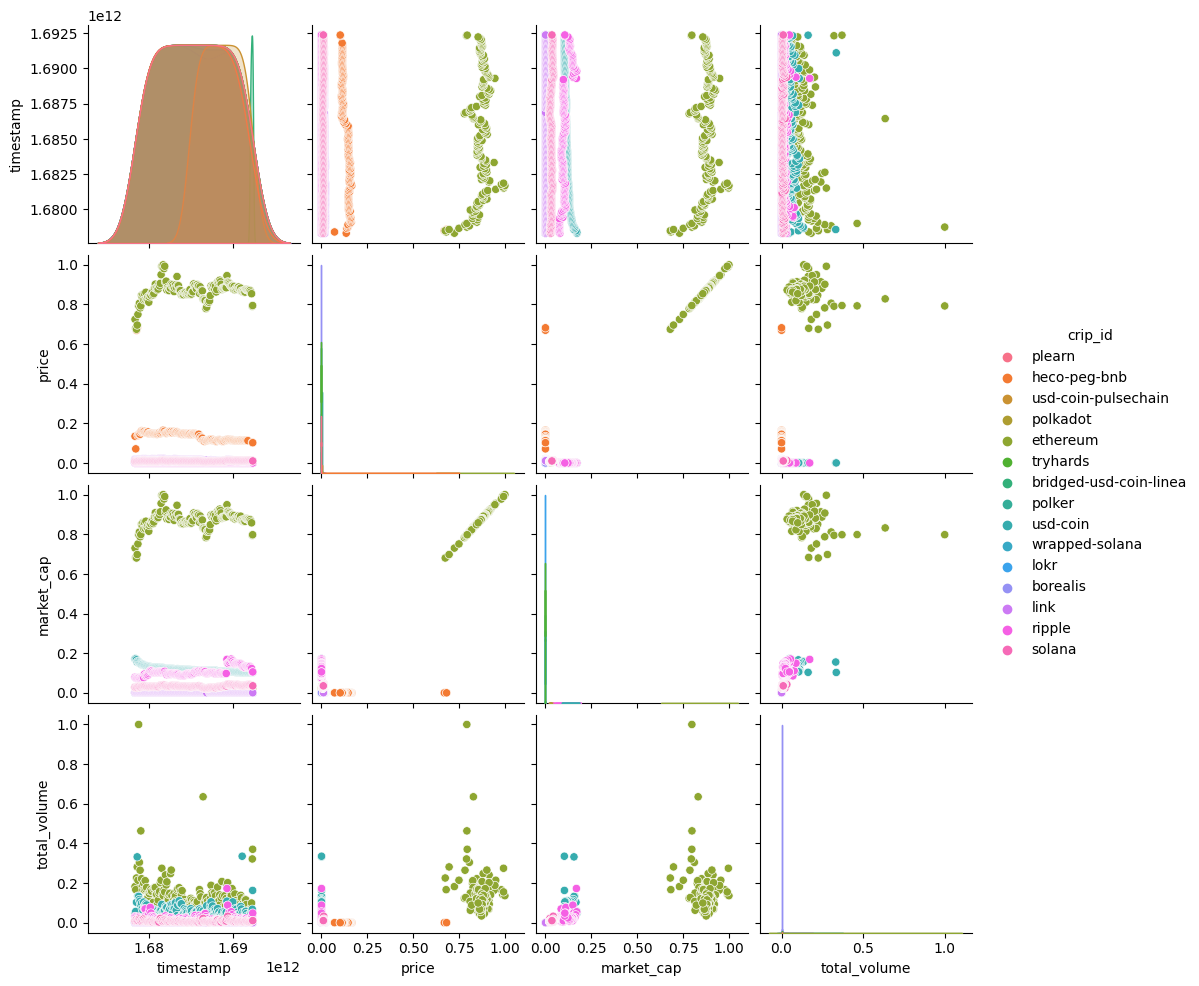

In [49]:
sns.pairplot(prices_normalized, hue = 'crip_id')

### 📈 OHLC of the currency
[
1594382400000 (time),
1.1 (open),
2.2 (high),
3.3 (low),
4.4 (close)
]

In [50]:
import pandas as pd
import requests
import time

def get_coin_ohlc_list(crip_id):
    url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        list_of_ohlc = response.json()
        df = pd.DataFrame(list_of_ohlc, columns=["timestamp", "open", "high", "low", "close"])
        df["crip_id"] = crip_id
        return df
    else:
        print(f"Error en la solicitud: Datos OHLC de {crip_id}", response.status_code)
        return None

if __name__ == "__main__":
   
    list_of_ohlc_data = pd.DataFrame()

    for crip_id in lista_coins:
        ohlc_data = get_coin_ohlc_list(crip_id)
        if ohlc_data is not None:
            list_of_ohlc_data = pd.concat([list_of_ohlc_data, ohlc_data], ignore_index=True)
        
        time.sleep(2)  # Agregar un retraso de 2 segundos entre solicitudes

    print(list_of_ohlc_data)


Error en la solicitud: Datos OHLC de bridged-tether-linea 429
Error en la solicitud: Datos OHLC de litecoin 429
Error en la solicitud: Datos OHLC de ethereum 429
Error en la solicitud: Datos OHLC de bitcoin 429
          timestamp       open       high        low      close  \
0     1689796800000    0.00846    0.00846    0.00841    0.00844   
1     1689811200000    0.00839    0.00845    0.00839    0.00845   
2     1689825600000    0.00844    0.00844    0.00839    0.00843   
3     1689840000000    0.00844    0.00847    0.00840    0.00847   
4     1689854400000    0.00841    0.00847    0.00841    0.00842   
...             ...        ...        ...        ...        ...   
3167  1692316800000  239.03155  239.03155  223.43227  225.51758   
3168  1692331200000  217.37557  218.11045  215.68672  215.68672   
3169  1692345600000  213.91538  217.69762  213.91538  217.69762   
3170  1692360000000  218.25486  218.25486  216.82627  216.87833   
3171  1692374400000  217.64473  217.64473  216.13268

In [83]:


    # def get_coin_list():
    #     url = f"https://api.coingecko.com/api/v3/coins/{crip_id}/ohlc?vs_currency=usd&days=30&precision=5"
        
    #     response = requests.get(url)
        
    #     if response.status_code == 200:
    #         list_of_ohlc = response.json()
    #         list_of_ohlc = pd.DataFrame(list_of_ohlc)
    #         return list_of_ohlc
    #     else:
    #         print("Error en la solicitud: Listado de monedas", response.status_code)
    #         return None

    # if __name__ == "__main__":
    #     list_of_ohlc = get_coin_list()
    #     if list_of_ohlc is not None:
    #         print(list_of_ohlc)

In [84]:
list_of_ohlc_data = list_of_ohlc_data.drop_duplicates()

In [85]:
list_of_ohlc_data.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
crip_id      0
dtype: int64

In [86]:
# No convierto a float32 porque altera demasiado el numero, necesito precicion en esta parte de los datos
print(list_of_ohlc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172 entries, 0 to 3171
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  3172 non-null   int64  
 1   open       3172 non-null   float64
 2   high       3172 non-null   float64
 3   low        3172 non-null   float64
 4   close      3172 non-null   float64
 5   crip_id    3172 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 148.8+ KB
None


In [87]:
list_of_ohlc_data.head()

,timestamp,open,high,low,close,crip_id
0,1689796800000,0.00846,0.00846,0.00841,0.00844,plearn
1,1689811200000,0.00839,0.00845,0.00839,0.00845,plearn
2,1689825600000,0.00844,0.00844,0.00839,0.00843,plearn
3,1689840000000,0.00844,0.00847,0.00840,0.00847,plearn
4,1689854400000,0.00841,0.00847,0.00841,0.00842,plearn


In [88]:
# Renombrar las columnas existentes utilizando el método rename
list_of_ohlc_data.rename(columns={0: 'timestamp', 1: 'open_price', 2: 'high_price', 3: 'low_price', 4: 'close_price'}, inplace=True)

# Imprimir el DataFrame resultante
print(list_of_ohlc_data)

          timestamp       open       high        low      close  \
0     1689796800000    0.00846    0.00846    0.00841    0.00844   
1     1689811200000    0.00839    0.00845    0.00839    0.00845   
2     1689825600000    0.00844    0.00844    0.00839    0.00843   
3     1689840000000    0.00844    0.00847    0.00840    0.00847   
4     1689854400000    0.00841    0.00847    0.00841    0.00842   
...             ...        ...        ...        ...        ...   
3167  1692316800000  239.03155  239.03155  223.43227  225.51758   
3168  1692331200000  217.37557  218.11045  215.68672  215.68672   
3169  1692345600000  213.91538  217.69762  213.91538  217.69762   
3170  1692360000000  218.25486  218.25486  216.82627  216.87833   
3171  1692374400000  217.64473  217.64473  216.13268  217.35720   

                    crip_id  
0                    plearn  
1                    plearn  
2                    plearn  
3                    plearn  
4                    plearn  
...            

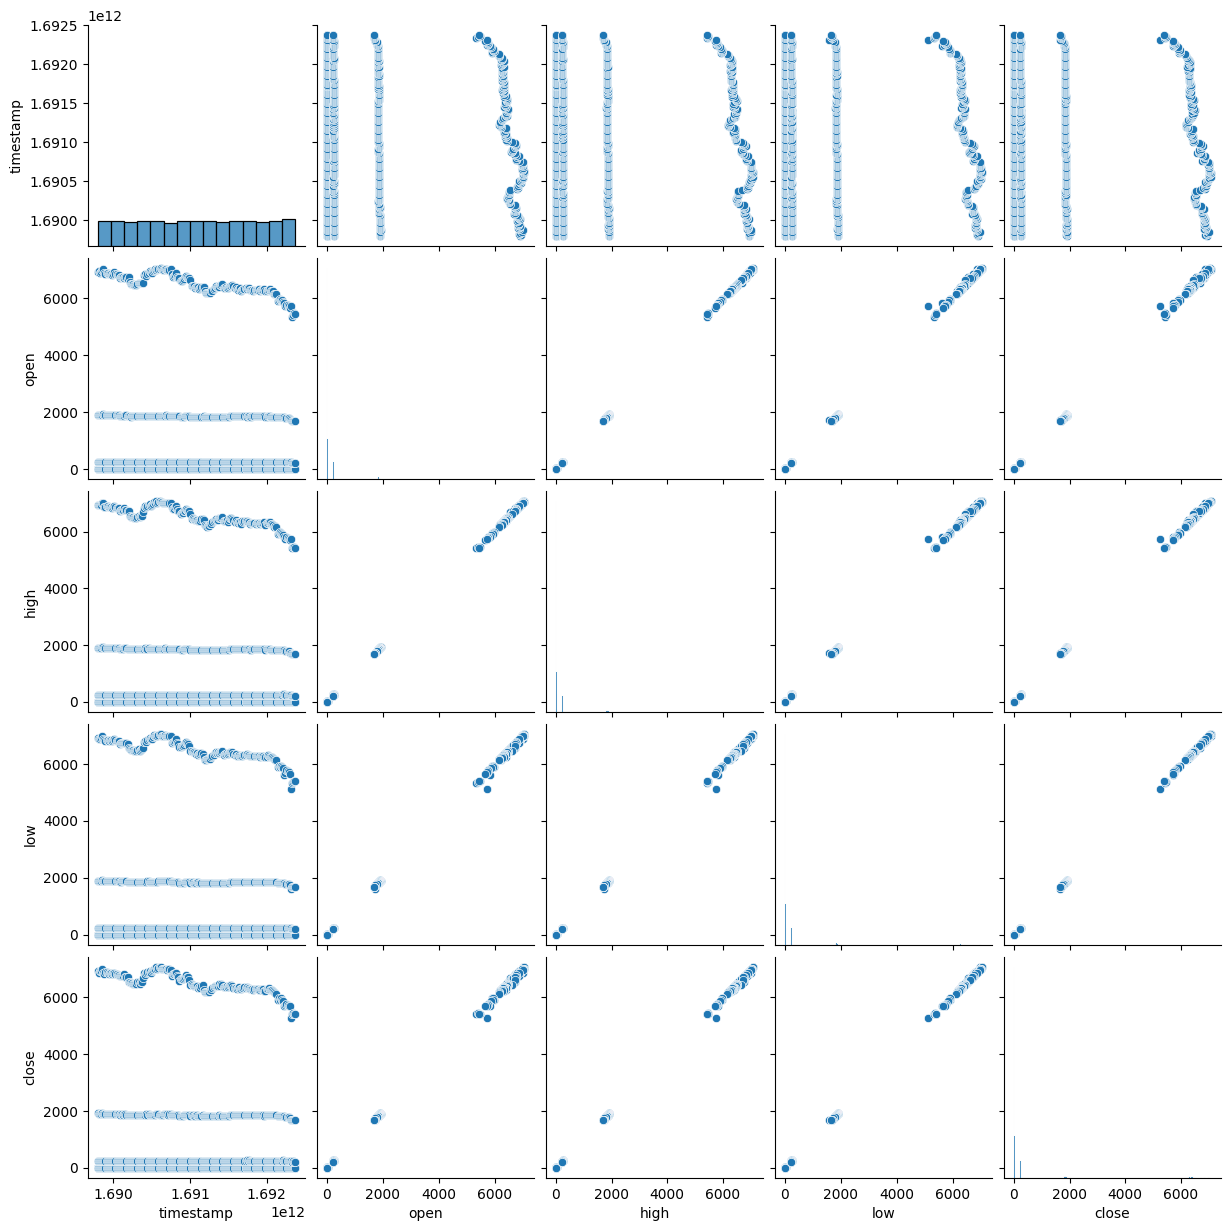

In [89]:
sns.pairplot(list_of_ohlc_data)

In [90]:
list_of_ohlc_data.head()

,timestamp,open,high,low,close,crip_id
0,1689796800000,0.00846,0.00846,0.00841,0.00844,plearn
1,1689811200000,0.00839,0.00845,0.00839,0.00845,plearn
2,1689825600000,0.00844,0.00844,0.00839,0.00843,plearn
3,1689840000000,0.00844,0.00847,0.00840,0.00847,plearn
4,1689854400000,0.00841,0.00847,0.00841,0.00842,plearn


In [91]:
unique_count = list_of_ohlc_data['crip_id'].nunique()
print(unique_count)


20


### 📃 tickers: Transacciones
Dionary:

last: latest unconverted price in the respective pair target currency

volume: unconverted 24h trading volume in the respective pair target currency

converted_last: latest converted price in BTC, ETH, and USD

converted_volume: converted 24h trading volume in BTC, ETH, and USD

Cache / Update Frequency: every 2 minutes

#### import data:

In [92]:
import pandas as pd
import requests
import time

def get_coin_tickers(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/tickers"
        
    response = requests.get(url)
        
    if response.status_code == 200:
        ticker_data = response.json()
        return ticker_data
    else:
        print("Error en la solicitud de tickers:", response.status_code)
        return None

if __name__ == "__main__":
    tickers_resume = pd.DataFrame()

    for crip_id in lista_coins:
        ticker_data = get_coin_tickers(crip_id)
            
        if ticker_data is not None:
            tickers = ticker_data['tickers']
            
            for ticker in tickers:
                ticker['coin_id'] = crip_id
                
                # Crear un DataFrame a partir de los datos del ticker
                ticker_df = pd.DataFrame([ticker])
                tickers_resume = pd.concat([tickers_resume, ticker_df], ignore_index=True)
                
        time.sleep(2)

    print(tickers_resume)


Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
Error en la solicitud de tickers: 429
                                           base  \
0                                           PLN   
1    0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3   
2    0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07   
3    0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F   
4    0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07   
..                                          ...   
431                                         LKR   
432                                         LKR   
433                                         LKR

In [93]:
pd.set_option('display.max_colwidth', None)

#### simple and mini ETL

In [94]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,PLN,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.007623,4.094592e+06,"{'btc': 2.91894e-07, 'eth': 4.57e-06, 'usd': 0.00763268}","{'btc': 1.195188, 'eth': 18.705414, 'usd': 31253}",green,1.06743,2023-08-18T15:33:14+00:00,2023-08-18T15:33:14+00:00,2023-08-18T15:33:14+00:00,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=PLN_USDT,None,plearn,tether
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,"{'name': 'Mdex', 'identifier': 'mdex', 'has_trading_incentive': True}",92.177587,1.164202e+01,"{'btc': 0.00831997, 'eth': 0.13021246, 'usd': 217.56}","{'btc': 0.09730751, 'eth': 1.522921, 'usd': 2544.47}",yellow,0.611178,2023-08-18T09:38:07+00:00,2023-08-18T09:38:07+00:00,2023-08-18T15:33:35+00:00,False,False,https://ht.mdex.co/#/swap?inputCurrency=0x4f99d10e16972ff2fe315eee53a95fc5a5870ce3&outputCurrency=0x5545153ccfca01fbd7dd11c0b23ba694d9509a6f,None,heco-peg-bnb,wrapped-huobi-token
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",22114.278691,2.466001e+06,"{'btc': 3.816e-05, 'eth': 0.00059741, 'usd': 0.998052}","{'btc': 92.076, 'eth': 1442, 'usd': 2408419}",green,0.602765,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,None,usd-coin-pulsechain,wrapped-pulse-wpls
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,"{'name': 'Phux', 'identifier': 'phux', 'has_trading_incentive': False}",0.998576,3.346969e+05,"{'btc': 3.817e-05, 'eth': 0.00059759, 'usd': 0.998176}","{'btc': 12.761612, 'eth': 199.781, 'usd': 333700}",green,0.602954,2023-08-18T15:34:46+00:00,2023-08-18T15:34:46+00:00,2023-08-18T15:34:46+00:00,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f&outputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07,None,usd-coin-pulsechain,usd-coin-pulsechain
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",0.998762,4.262423e+04,"{'btc': 3.827e-05, 'eth': 0.00059914, 'usd': 1.001}","{'btc': 1.63031, 'eth': 25.52545, 'usd': 42644}",green,0.6046,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,None,usd-coin-pulsechain,dai-pulsechain


In [95]:
# Filtrar y mostrar las filas con valores nulos
rows_with_nulls = tickers_resume[tickers_resume.isnull().any(axis=1)]
rows_with_nulls.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,PLN,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.007623,4.094592e+06,"{'btc': 2.91894e-07, 'eth': 4.57e-06, 'usd': 0.00763268}","{'btc': 1.195188, 'eth': 18.705414, 'usd': 31253}",green,1.06743,2023-08-18T15:33:14+00:00,2023-08-18T15:33:14+00:00,2023-08-18T15:33:14+00:00,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=PLN_USDT,None,plearn,tether
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,"{'name': 'Mdex', 'identifier': 'mdex', 'has_trading_incentive': True}",92.177587,1.164202e+01,"{'btc': 0.00831997, 'eth': 0.13021246, 'usd': 217.56}","{'btc': 0.09730751, 'eth': 1.522921, 'usd': 2544.47}",yellow,0.611178,2023-08-18T09:38:07+00:00,2023-08-18T09:38:07+00:00,2023-08-18T15:33:35+00:00,False,False,https://ht.mdex.co/#/swap?inputCurrency=0x4f99d10e16972ff2fe315eee53a95fc5a5870ce3&outputCurrency=0x5545153ccfca01fbd7dd11c0b23ba694d9509a6f,None,heco-peg-bnb,wrapped-huobi-token
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",22114.278691,2.466001e+06,"{'btc': 3.816e-05, 'eth': 0.00059741, 'usd': 0.998052}","{'btc': 92.076, 'eth': 1442, 'usd': 2408419}",green,0.602765,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,None,usd-coin-pulsechain,wrapped-pulse-wpls
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,"{'name': 'Phux', 'identifier': 'phux', 'has_trading_incentive': False}",0.998576,3.346969e+05,"{'btc': 3.817e-05, 'eth': 0.00059759, 'usd': 0.998176}","{'btc': 12.761612, 'eth': 199.781, 'usd': 333700}",green,0.602954,2023-08-18T15:34:46+00:00,2023-08-18T15:34:46+00:00,2023-08-18T15:34:46+00:00,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f&outputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07,None,usd-coin-pulsechain,usd-coin-pulsechain
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",0.998762,4.262423e+04,"{'btc': 3.827e-05, 'eth': 0.00059914, 'usd': 1.001}","{'btc': 1.63031, 'eth': 25.52545, 'usd': 42644}",green,0.6046,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,2023-08-18T15:35:33+00:00,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,None,usd-coin-pulsechain,dai-pulsechain


In [96]:
tickers_resume['token_info_url'] = tickers_resume['token_info_url'].fillna('not founded token_info_url #404')
tickers_resume['trade_url'] = tickers_resume['trade_url'].fillna('not founded trade_url #404')

In [97]:
tickers_resume['target_coin_id'] = tickers_resume['target_coin_id'].fillna('USD')

In [98]:
tickers_resume.shape

(436, 18)

In [99]:
tickers_resume.isnull().sum()

base                          0
target                        0
market                        0
last                          0
volume                        0
converted_last                0
converted_volume              0
trust_score                  47
bid_ask_spread_percentage    35
timestamp                     0
last_traded_at                0
last_fetch_at                 0
is_anomaly                    0
is_stale                      0
trade_url                     0
token_info_url                0
coin_id                       0
target_coin_id                0
dtype: int64

#### Timestamp

In [100]:
# Convertir el formato de timestamp a timestamp numérico y agregar al DataFrame
tickers_resume['timestamp'] = tickers_resume['timestamp'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_traded_at'] = tickers_resume['last_traded_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)
tickers_resume['last_fetch_at'] = tickers_resume['last_fetch_at'].apply(lambda x: int(datetime.fromisoformat(x).timestamp()) * 1000)

In [101]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id
0,PLN,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.007623,4.094592e+06,"{'btc': 2.91894e-07, 'eth': 4.57e-06, 'usd': 0.00763268}","{'btc': 1.195188, 'eth': 18.705414, 'usd': 31253}",green,1.06743,1692372794000,1692372794000,1692372794000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=PLN_USDT,not founded token_info_url #404,plearn,tether
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,"{'name': 'Mdex', 'identifier': 'mdex', 'has_trading_incentive': True}",92.177587,1.164202e+01,"{'btc': 0.00831997, 'eth': 0.13021246, 'usd': 217.56}","{'btc': 0.09730751, 'eth': 1.522921, 'usd': 2544.47}",yellow,0.611178,1692351487000,1692351487000,1692372815000,False,False,https://ht.mdex.co/#/swap?inputCurrency=0x4f99d10e16972ff2fe315eee53a95fc5a5870ce3&outputCurrency=0x5545153ccfca01fbd7dd11c0b23ba694d9509a6f,not founded token_info_url #404,heco-peg-bnb,wrapped-huobi-token
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",22114.278691,2.466001e+06,"{'btc': 3.816e-05, 'eth': 0.00059741, 'usd': 0.998052}","{'btc': 92.076, 'eth': 1442, 'usd': 2408419}",green,0.602765,1692372933000,1692372933000,1692372933000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,not founded token_info_url #404,usd-coin-pulsechain,wrapped-pulse-wpls
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,"{'name': 'Phux', 'identifier': 'phux', 'has_trading_incentive': False}",0.998576,3.346969e+05,"{'btc': 3.817e-05, 'eth': 0.00059759, 'usd': 0.998176}","{'btc': 12.761612, 'eth': 199.781, 'usd': 333700}",green,0.602954,1692372886000,1692372886000,1692372886000,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f&outputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07,not founded token_info_url #404,usd-coin-pulsechain,usd-coin-pulsechain
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",0.998762,4.262423e+04,"{'btc': 3.827e-05, 'eth': 0.00059914, 'usd': 1.001}","{'btc': 1.63031, 'eth': 25.52545, 'usd': 42644}",green,0.6046,1692372933000,1692372933000,1692372933000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,not founded token_info_url #404,usd-coin-pulsechain,dai-pulsechain


#### market

In [102]:
tickers_resume['marketplace'] = tickers_resume['market'].apply(lambda x: x['name'])
tickers_resume['marketplace_id'] = tickers_resume['market'].apply(lambda x: x['identifier'])

In [103]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id
0,PLN,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.007623,4.094592e+06,"{'btc': 2.91894e-07, 'eth': 4.57e-06, 'usd': 0.00763268}","{'btc': 1.195188, 'eth': 18.705414, 'usd': 31253}",green,1.06743,1692372794000,1692372794000,1692372794000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=PLN_USDT,not founded token_info_url #404,plearn,tether,BitMart,bitmart
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,"{'name': 'Mdex', 'identifier': 'mdex', 'has_trading_incentive': True}",92.177587,1.164202e+01,"{'btc': 0.00831997, 'eth': 0.13021246, 'usd': 217.56}","{'btc': 0.09730751, 'eth': 1.522921, 'usd': 2544.47}",yellow,0.611178,1692351487000,1692351487000,1692372815000,False,False,https://ht.mdex.co/#/swap?inputCurrency=0x4f99d10e16972ff2fe315eee53a95fc5a5870ce3&outputCurrency=0x5545153ccfca01fbd7dd11c0b23ba694d9509a6f,not founded token_info_url #404,heco-peg-bnb,wrapped-huobi-token,Mdex,mdex
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",22114.278691,2.466001e+06,"{'btc': 3.816e-05, 'eth': 0.00059741, 'usd': 0.998052}","{'btc': 92.076, 'eth': 1442, 'usd': 2408419}",green,0.602765,1692372933000,1692372933000,1692372933000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,not founded token_info_url #404,usd-coin-pulsechain,wrapped-pulse-wpls,PulseX,pulsex
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,"{'name': 'Phux', 'identifier': 'phux', 'has_trading_incentive': False}",0.998576,3.346969e+05,"{'btc': 3.817e-05, 'eth': 0.00059759, 'usd': 0.998176}","{'btc': 12.761612, 'eth': 199.781, 'usd': 333700}",green,0.602954,1692372886000,1692372886000,1692372886000,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f&outputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07,not founded token_info_url #404,usd-coin-pulsechain,usd-coin-pulsechain,Phux,phux
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",0.998762,4.262423e+04,"{'btc': 3.827e-05, 'eth': 0.00059914, 'usd': 1.001}","{'btc': 1.63031, 'eth': 25.52545, 'usd': 42644}",green,0.6046,1692372933000,1692372933000,1692372933000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,not founded token_info_url #404,usd-coin-pulsechain,dai-pulsechain,PulseX,pulsex


#### converted_last


In [104]:
tickers_resume['converted_last_btc'] = tickers_resume['converted_last'].apply(lambda x: x['btc'])
tickers_resume['converted_last_eth'] = tickers_resume['converted_last'].apply(lambda x: x['eth'])
tickers_resume['converted_last_usd'] = tickers_resume['converted_last'].apply(lambda x: x['usd'])

In [105]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       436 non-null    object 
 1   target                     436 non-null    object 
 2   market                     436 non-null    object 
 3   last                       436 non-null    float64
 4   volume                     436 non-null    float64
 5   converted_last             436 non-null    object 
 6   converted_volume           436 non-null    object 
 7   trust_score                389 non-null    object 
 8   bid_ask_spread_percentage  401 non-null    object 
 9   timestamp                  436 non-null    int64  
 10  last_traded_at             436 non-null    int64  
 11  last_fetch_at              436 non-null    int64  
 12  is_anomaly                 436 non-null    bool   
 13  is_stale                   436 non-null    bool   

In [106]:
tickers_resume.head()

,base,target,market,last,volume,converted_last,converted_volume,trust_score,bid_ask_spread_percentage,timestamp,...,is_stale,trade_url,token_info_url,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd
0,PLN,USDT,"{'name': 'BitMart', 'identifier': 'bitmart', 'has_trading_incentive': False}",0.007623,4.094592e+06,"{'btc': 2.91894e-07, 'eth': 4.57e-06, 'usd': 0.00763268}","{'btc': 1.195188, 'eth': 18.705414, 'usd': 31253}",green,1.06743,1692372794000,...,False,https://www.bitmart.com/trade/en?layout=basic&symbol=PLN_USDT,not founded token_info_url #404,plearn,tether,BitMart,bitmart,2.918940e-07,0.000005,0.007633
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,"{'name': 'Mdex', 'identifier': 'mdex', 'has_trading_incentive': True}",92.177587,1.164202e+01,"{'btc': 0.00831997, 'eth': 0.13021246, 'usd': 217.56}","{'btc': 0.09730751, 'eth': 1.522921, 'usd': 2544.47}",yellow,0.611178,1692351487000,...,False,https://ht.mdex.co/#/swap?inputCurrency=0x4f99d10e16972ff2fe315eee53a95fc5a5870ce3&outputCurrency=0x5545153ccfca01fbd7dd11c0b23ba694d9509a6f,not founded token_info_url #404,heco-peg-bnb,wrapped-huobi-token,Mdex,mdex,8.319970e-03,0.130212,217.560000
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",22114.278691,2.466001e+06,"{'btc': 3.816e-05, 'eth': 0.00059741, 'usd': 0.998052}","{'btc': 92.076, 'eth': 1442, 'usd': 2408419}",green,0.602765,1692372933000,...,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,not founded token_info_url #404,usd-coin-pulsechain,wrapped-pulse-wpls,PulseX,pulsex,3.816000e-05,0.000597,0.998052
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,"{'name': 'Phux', 'identifier': 'phux', 'has_trading_incentive': False}",0.998576,3.346969e+05,"{'btc': 3.817e-05, 'eth': 0.00059759, 'usd': 0.998176}","{'btc': 12.761612, 'eth': 199.781, 'usd': 333700}",green,0.602954,1692372886000,...,False,https://phux.io/#/pulse/trade?inputCurrency=0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f&outputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07,not founded token_info_url #404,usd-coin-pulsechain,usd-coin-pulsechain,Phux,phux,3.817000e-05,0.000598,0.998176
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,"{'name': 'PulseX', 'identifier': 'pulsex', 'has_trading_incentive': False}",0.998762,4.262423e+04,"{'btc': 3.827e-05, 'eth': 0.00059914, 'usd': 1.001}","{'btc': 1.63031, 'eth': 25.52545, 'usd': 42644}",green,0.6046,1692372933000,...,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,not founded token_info_url #404,usd-coin-pulsechain,dai-pulsechain,PulseX,pulsex,3.827000e-05,0.000599,1.001000


#### converted_volume


In [107]:
tickers_resume['converted_volume_btc'] = tickers_resume['converted_volume'].apply(lambda x: x['btc'])
tickers_resume['converted_volume_eth'] = tickers_resume['converted_volume'].apply(lambda x: x['eth'])
tickers_resume['converted_volume_usd'] = tickers_resume['converted_volume'].apply(lambda x: x['usd'])

In [108]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       436 non-null    object 
 1   target                     436 non-null    object 
 2   market                     436 non-null    object 
 3   last                       436 non-null    float64
 4   volume                     436 non-null    float64
 5   converted_last             436 non-null    object 
 6   converted_volume           436 non-null    object 
 7   trust_score                389 non-null    object 
 8   bid_ask_spread_percentage  401 non-null    object 
 9   timestamp                  436 non-null    int64  
 10  last_traded_at             436 non-null    int64  
 11  last_fetch_at              436 non-null    int64  
 12  is_anomaly                 436 non-null    bool   
 13  is_stale                   436 non-null    bool   

In [109]:
column_drop = ['market','converted_last','converted_volume']
# Eliminar las columnas del DataFrame
tickers_resume = tickers_resume.drop(columns=column_drop)

In [110]:
tickers_resume.head()

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,...,coin_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,PLN,USDT,0.007623,4.094592e+06,green,1.06743,1692372794000,1692372794000,1692372794000,False,...,plearn,tether,BitMart,bitmart,2.918940e-07,0.000005,0.007633,1.195188,18.705414,31253.00
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,92.177587,1.164202e+01,yellow,0.611178,1692351487000,1692351487000,1692372815000,False,...,heco-peg-bnb,wrapped-huobi-token,Mdex,mdex,8.319970e-03,0.130212,217.560000,0.097308,1.522921,2544.47
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,22114.278691,2.466001e+06,green,0.602765,1692372933000,1692372933000,1692372933000,False,...,usd-coin-pulsechain,wrapped-pulse-wpls,PulseX,pulsex,3.816000e-05,0.000597,0.998052,92.076000,1442.000000,2408419.00
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0.998576,3.346969e+05,green,0.602954,1692372886000,1692372886000,1692372886000,False,...,usd-coin-pulsechain,usd-coin-pulsechain,Phux,phux,3.817000e-05,0.000598,0.998176,12.761612,199.781000,333700.00
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,0.998762,4.262423e+04,green,0.6046,1692372933000,1692372933000,1692372933000,False,...,usd-coin-pulsechain,dai-pulsechain,PulseX,pulsex,3.827000e-05,0.000599,1.001000,1.630310,25.525450,42644.00


In [111]:
tickers_resume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   base                       436 non-null    object 
 1   target                     436 non-null    object 
 2   last                       436 non-null    float64
 3   volume                     436 non-null    float64
 4   trust_score                389 non-null    object 
 5   bid_ask_spread_percentage  401 non-null    object 
 6   timestamp                  436 non-null    int64  
 7   last_traded_at             436 non-null    int64  
 8   last_fetch_at              436 non-null    int64  
 9   is_anomaly                 436 non-null    bool   
 10  is_stale                   436 non-null    bool   
 11  trade_url                  436 non-null    object 
 12  token_info_url             436 non-null    object 
 13  coin_id                    436 non-null    object 

#### ticker_df numeric cols correlation matrix

In [112]:

# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

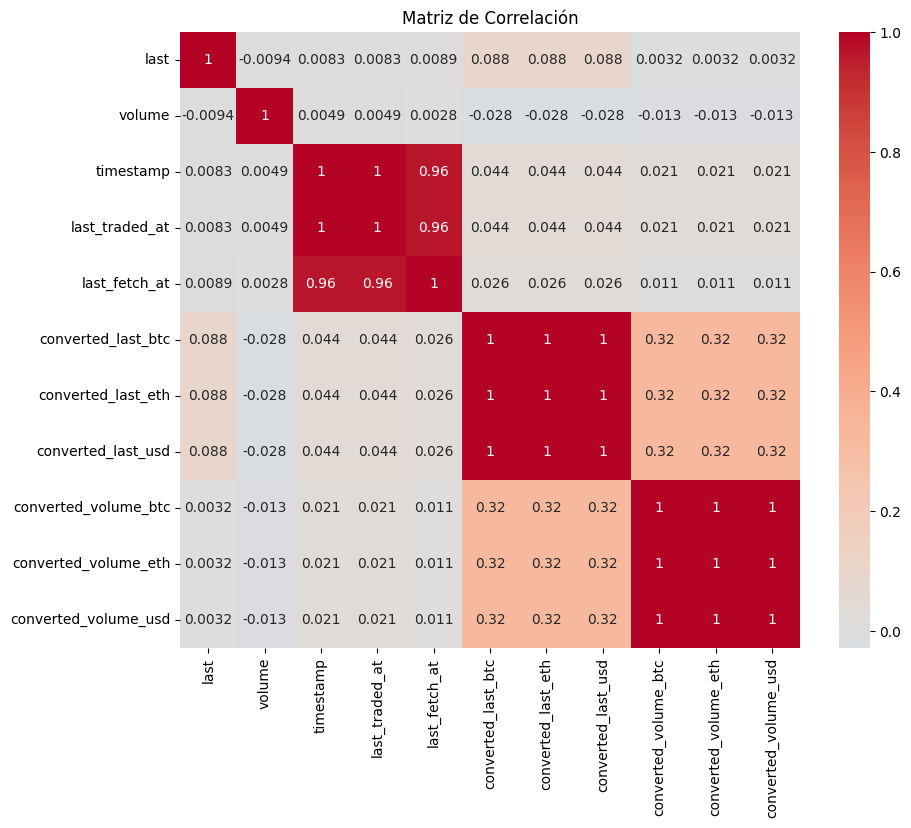

In [113]:
# Crear un heatmap utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()

#### Producto ticker_df:

In [114]:
# Aplicar lowercase a todo el DataFrame
tickers_resume = tickers_resume.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

AttributeError: Can only use .str accessor with string values!

In [115]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [117]:
# Renombrar la columna
tickers_resume.rename(columns={'coin_id': 'crip_id'}, inplace=True)
tickers_resume.head(20)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,PLN,USDT,0.007623,4.094592e+06,green,1.06743,1692372794000,1692372794000,1692372794000,False,False,https://www.bitmart.com/trade/en?layout=basic&symbol=PLN_USDT,not founded token_info_url #404,plearn,tether,BitMart,bitmart,2.918940e-07,0.000005,0.007633,1.195188,18.705414,31253.00
1,0X4F99D10E16972FF2FE315EEE53A95FC5A5870CE3,0X5545153CCFCA01FBD7DD11C0B23BA694D9509A6F,92.177587,1.164202e+01,yellow,0.611178,1692351487000,1692351487000,1692372815000,False,False,https://ht.mdex.co/#/swap?inputCurrency=0x4f99d10e16972ff2fe315eee53a95fc5a5870ce3&outputCurrency=0x5545153ccfca01fbd7dd11c0b23ba694d9509a6f,not founded token_info_url #404,heco-peg-bnb,wrapped-huobi-token,Mdex,mdex,8.319970e-03,0.130212,217.560000,0.097308,1.522921,2544.47
2,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,22114.278691,2.466001e+06,green,0.602765,1692372933000,1692372933000,1692372933000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,not founded token_info_url #404,usd-coin-pulsechain,wrapped-pulse-wpls,PulseX,pulsex,3.816000e-05,0.000597,0.998052,92.076000,1442.000000,2408419.00
3,0X0CB6F5A34AD42EC934882A05265A7D5F59B51A2F,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0.998576,3.346969e+05,green,0.602954,1692372886000,1692372886000,1692372886000,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x0cb6f5a34ad42ec934882a05265a7d5f59b51a2f&outputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07,not founded token_info_url #404,usd-coin-pulsechain,usd-coin-pulsechain,Phux,phux,3.817000e-05,0.000598,0.998176,12.761612,199.781000,333700.00
4,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,0.998762,4.262423e+04,green,0.6046,1692372933000,1692372933000,1692372933000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,not founded token_info_url #404,usd-coin-pulsechain,dai-pulsechain,PulseX,pulsex,3.827000e-05,0.000599,1.001000,1.630310,25.525450,42644.00
5,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,21989.202750,8.660229e+03,green,0.604708,1692371407000,1692371407000,1692372886000,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xa1077a294dde1b09bb078844df40758a5d0f9a27,not founded token_info_url #404,usd-coin-pulsechain,wrapped-pulse-wpls,Phux,phux,3.794000e-05,0.000594,0.992097,0.323213,5.059855,8451.63
6,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0X9663C2D75FFD5F4017310405FCE61720AF45B829,185.286955,6.360310e+03,green,0.60472,1692372886000,1692372886000,1692372886000,False,False,https://phux.io/#/pulse/trade?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0x9663c2d75ffd5f4017310405fce61720af45b829,not founded token_info_url #404,usd-coin-pulsechain,phux-governance-token,Phux,phux,3.817000e-05,0.000598,0.998176,0.244679,3.830415,6398.06
7,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XEFD766CCB38EAF1DFD701853BFCE31359239F305,0.994116,1.547422e+04,green,0.605636,1692372714000,1692372714000,1692372884000,False,False,https://app.pulsex.com/swap?inputCurrency=0x15d38573d2feeb82e7ad5187ab8c1d52810b1f07&outputCurrency=0xefd766ccb38eaf1dfd701853bfce31359239f305,not founded token_info_url #404,usd-coin-pulsechain,dai-pulsechain,PulseX V2,pulsex-v2,3.809000e-05,0.000596,0.995986,0.589792,9.233102,15422.33
8,0X15D38573D2FEEB82E7AD5187AB8C1D52810B1F07,0XA1077A294DDE1B09BB078844DF40758A5D0F9A27,22162.366404,1.087524e+05,green,0.608635,169237288400

### normalized ticker_df for ML then

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = tickers_resume.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])

In [ ]:
numeric_columns.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,27888.42,61846.440450,0.010036,1692302821000,1692302821000,1692302821000,0.999709,16.044464,27855,62904.0,1009562.0,1752745180
1,27892.80,85157.484910,0.014437,1692302836000,1692302836000,1692302836000,0.999029,16.033554,27837,86679.0,1391117.0,2415178942
2,27898.79,18401.983103,0.010036,1692302782000,1692302782000,1692302782000,1.000080,16.051441,27870,18717.0,300417.0,521607279
3,27859.29,20115.406269,0.010754,1692302761000,1692302761000,1692302820000,0.999845,16.046650,27859,20112.0,322785.0,560400937
4,27867.50,3052.440177,0.010359,1692302761000,1692302761000,1692302820000,1.000139,16.051379,27868,3053.0,48996.0,85063877


In [ ]:
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización Min-Max al DataFrame
normalized_numeric_columns = scaler.fit_transform(numeric_columns)

# Crear un nuevo DataFrame normalizado
normalized_df = pd.DataFrame(normalized_numeric_columns, columns=numeric_columns.columns)

In [ ]:
normalized_df.head()

,last,volume,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,0.999051,0.002031,0.000083,0.961861,0.961861,0.943883,0.544199,0.526445,0.394366,0.725698,0.725706,0.725706
1,0.999208,0.002796,0.010813,0.973303,0.973303,0.960718,0.180705,0.174815,0.140845,1.000000,1.000000,1.000000
2,0.999423,0.000604,0.000083,0.932113,0.932113,0.900112,0.742806,0.751313,0.605634,0.215894,0.215913,0.215930
3,0.998008,0.000660,0.001833,0.916095,0.916095,0.942761,0.617037,0.596899,0.450704,0.231989,0.231993,0.231993
4,0.998302,0.000100,0.000870,0.916095,0.916095,0.942761,0.774353,0.749315,0.577465,0.035172,0.035170,0.035170


### 🌎📊 Global Eecentralized Finance(defi) data:
Code	Description
defi_market_cap	
Defi Market Capitalization in USD

eth_market_cap	
Ethereum Market Capitalization in USD

defi_to_eth_ratio	
defi_market_cap to eth_market_cap ratio

trading_volume_24h	
defi trading volume in 24h in USD

defi_dominance	
defi_market_cap to total_market_cap ratio

top_coin_name	
defi coin with largest market_cap

top_coin_dominance	
top defi coin market dominance

In [ ]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/global/decentralized_finance_defi"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_ecentralized_data = response.json()
        list_of_global_ecentralized_data = pd.DataFrame(global_ecentralized_data)
        return list_of_global_ecentralized_data
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    list_of_global_ecentralized_data = get_coin_list()
    if list_of_global_ecentralized_data is not None:
        print(list_of_global_ecentralized_data)


                                                                            data
defi_dominance            3.7749411642424498084125822630965093804438317150475615
defi_market_cap                                   43517267308.652010111734171082
defi_to_eth_ratio        20.8688342380957726726170358391051678275619131185351157
eth_market_cap                                   208527543092.042157944770394475
top_coin_defi_dominance                                                32.532714
top_coin_name                                                  Lido Staked Ether
trading_volume_24h                               1846682814.63479108086030983843


### 🌎📰 Trending top 7:
Top-7 trending coins on CoinGecko as searched by users in the last 24 hours (Ordered by most popular first).

In [ ]:
def get_coin_list():
    url = "https://api.coingecko.com/api/v3/search/trending"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        global_trends = response.json()
        coins_data_global_trends = global_trends.get('coins', [])  # Extract coins data
        
        coins_global_trends = pd.DataFrame([item['item'] for item in coins_data_global_trends])  # Create DataFrame for coins
        
        return coins_global_trends
    else:
        print("Error en la solicitud: Listado de monedas", response.status_code)
        return None

if __name__ == "__main__":
    coins_global_trends = get_coin_list()
    if coins_global_trends is not None:
        print("Coins DataFrame:")
        print(coins_global_trends)



Coins DataFrame:
Empty DataFrame
Columns: []
Index: []


In [ ]:
coins_global_trends.head(10)

""


creo que podrai realizar el ranking propio

_____________________________________________________________

### notas: En un futuro me gustaria agregar webscraping, para lectura de diarions, novedades paginas con valor agregado en informacion sobre los mercados, no solo de criptomonedas si no tambien del mundo global, acciones de empresas, bonos estatales, por ejemplo..

_________________________________________

# 📝 🧠 Funcion Generadora de informacion:

In [ ]:
coin_id.head()


AttributeError: 'str' object has no attribute 'head'